In [1]:
import requests
r=requests.get('https://en.wikipedia.org/wiki/Wiki')
print(r.text)

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-available" lang="en" dir="ltr">
<head>
<meta charset="UTF-8">
<title>Wiki - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom

In [2]:
import requests
from bs4 import BeautifulSoup
import csv

base_url = 'https://books.toscrape.com/catalogue/'
categories = ['fiction_10', 'science-fiction_16', 'historical-fiction_4']

for category in categories:
    url = f'{base_url}category/books/{category}/index.html'
    print(f"Scraping books for category: {category}")
    book_data = []
    page_number = 1
    total_books = 0

    while total_books < 100:
        page_url = f"{url}?page={page_number}"
        response = requests.get(page_url)
        soup = BeautifulSoup(response.content, 'html.parser')
        print(soup.title.string)

        for book in soup.find_all('article', class_='product_pod'):
            title = book.h3.a.get('title')
            price = book.find('p', class_='price_color').get_text()
            availability = book.find('p', class_='instock availability').get_text().strip()
            image_url = book.img.get('src')
            rating = book.find('p', class_='star-rating')['class'][1]
            product_page_url = book.h3.a.get('href')

            book_data.append({
                'Title': title,
                'Price': price,
                'Availability': availability,
                'Image URL': image_url,
                'Rating': rating,
                'Product Page URL': f'{base_url}{product_page_url}'
            })
            total_books += 1
        page_number += 1

    filename = f'{category}_books.csv'
    keys = book_data[0].keys() if book_data else []
    with open(filename, 'w', newline='', encoding='utf-8') as csv_file:
        writer = csv.DictWriter(csv_file, fieldnames=keys)
        writer.writeheader()
        writer.writerows(book_data)
    
    print(f"Books data for '{category}' category saved in '{filename}'")

Scraping books for category: fiction_10

    Fiction | 
     Books to Scrape - Sandbox



    Fiction | 
     Books to Scrape - Sandbox



    Fiction | 
     Books to Scrape - Sandbox



    Fiction | 
     Books to Scrape - Sandbox



    Fiction | 
     Books to Scrape - Sandbox


Books data for 'fiction_10' category saved in 'fiction_10_books.csv'
Scraping books for category: science-fiction_16

    Science Fiction | 
     Books to Scrape - Sandbox



    Science Fiction | 
     Books to Scrape - Sandbox



    Science Fiction | 
     Books to Scrape - Sandbox



    Science Fiction | 
     Books to Scrape - Sandbox



    Science Fiction | 
     Books to Scrape - Sandbox



    Science Fiction | 
     Books to Scrape - Sandbox



    Science Fiction | 
     Books to Scrape - Sandbox


Books data for 'science-fiction_16' category saved in 'science-fiction_16_books.csv'
Scraping books for category: historical-fiction_4

    Historical Fiction | 
     Books to Scrape - Sandbox



   

In [9]:
import os

for category in categories:
    filename = f'{category}_books.csv'
    if not os.path.exists(filename):
        print(f"File {filename} does not exist!")
    else:
        print(f"File {filename} exists.")

File fiction_10_books.csv exists.
File science-fiction_16_books.csv exists.
File historical-fiction_4_books.csv exists.


In [7]:
categories = ['fiction_10', 'science-fiction_16', 'historical-fiction_4']

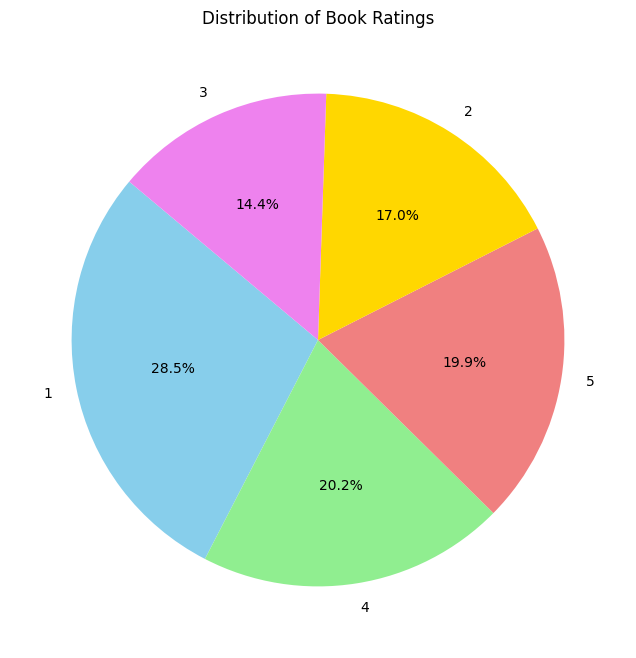

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Define the categories
categories = ['fiction_10', 'science-fiction_16', 'historical-fiction_4']

# Load data from CSV files
data_frames = []
for category in categories:
    filename = f'{category}_books.csv'
    if not os.path.exists(filename):
        print(f"File {filename} does not exist! Skipping...")
        continue
    try:
        df = pd.read_csv(filename)
        df['Category'] = category  # Add a column for the category
        data_frames.append(df)
    except Exception as e:
        print(f"Error loading {filename}: {e}")

# Check if data_frames is populated
if not data_frames:
    print("No DataFrames were loaded. Exiting...")
else:
    # Combine all data into a single DataFrame
    all_data = pd.concat(data_frames)

    # Count the number of books by rating
    rating_counts = all_data['Rating'].value_counts()

    # Optionally, map rating strings to numerical values for better labeling
    rating_map = {'One': 1, 'Two': 2, 'Three': 3, 'Four': 4, 'Five': 5}
    rating_counts.index = rating_counts.index.map(rating_map)

    # Plot
    plt.figure(figsize=(8, 8))
    plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen', 'lightcoral', 'gold', 'violet'])
    plt.title('Distribution of Book Ratings')
    plt.show()

In [13]:
# Remove the currency symbol and convert to numeric
all_data['Price'] = all_data['Price'].replace('[\£,]', '', regex=True).astype(float)

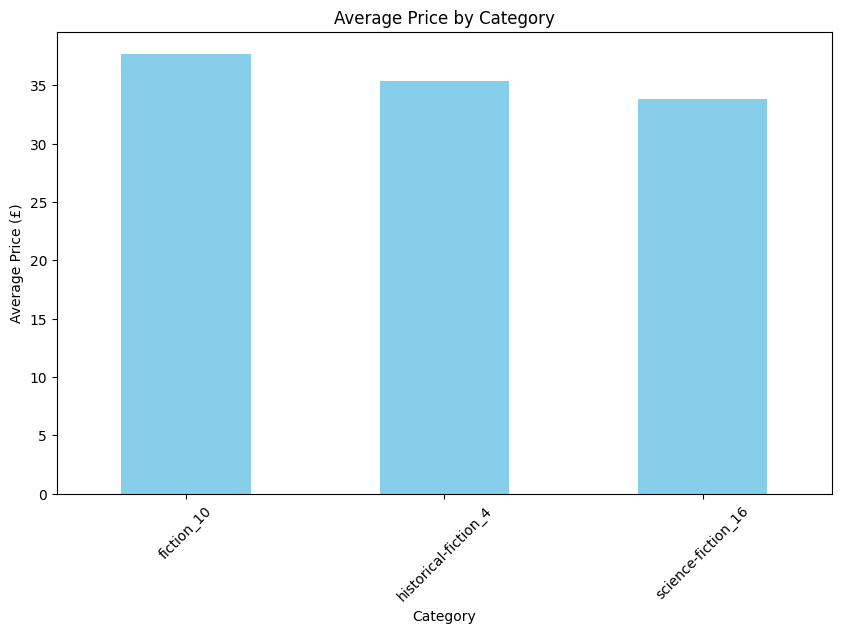

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Remove the currency symbol and convert to numeric
all_data['Price'] = all_data['Price'].replace('[\£,]', '', regex=True).astype(float)

# Calculate average price by category
avg_price_by_category = all_data.groupby('Category')['Price'].mean()

# Plot
plt.figure(figsize=(10, 6))
avg_price_by_category.plot(kind='bar', color='skyblue')
plt.title('Average Price by Category')
plt.xlabel('Category')
plt.ylabel('Average Price (£)')
plt.xticks(rotation=45)
plt.show()

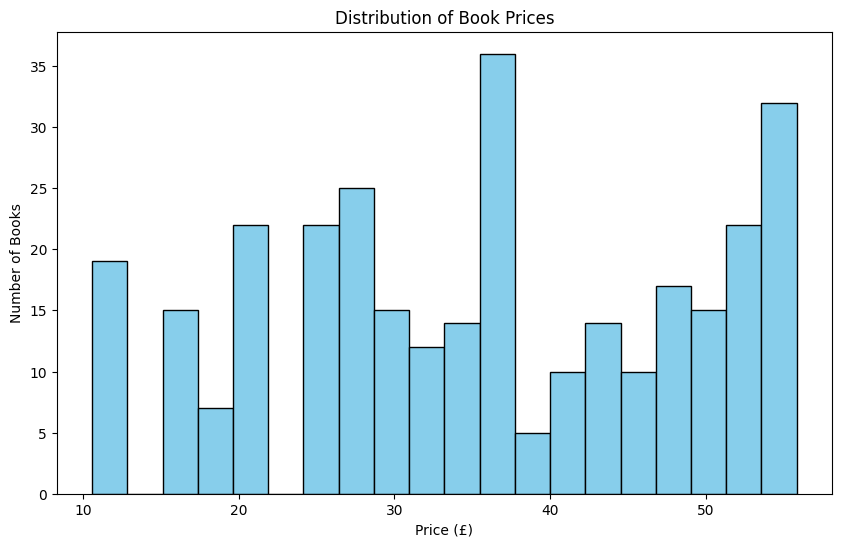

In [15]:
# Plot
plt.figure(figsize=(10, 6))
plt.hist(all_data['Price'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Book Prices')
plt.xlabel('Price (£)')
plt.ylabel('Number of Books')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_10264\85627634.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Price', data=all_data, palette='pastel')


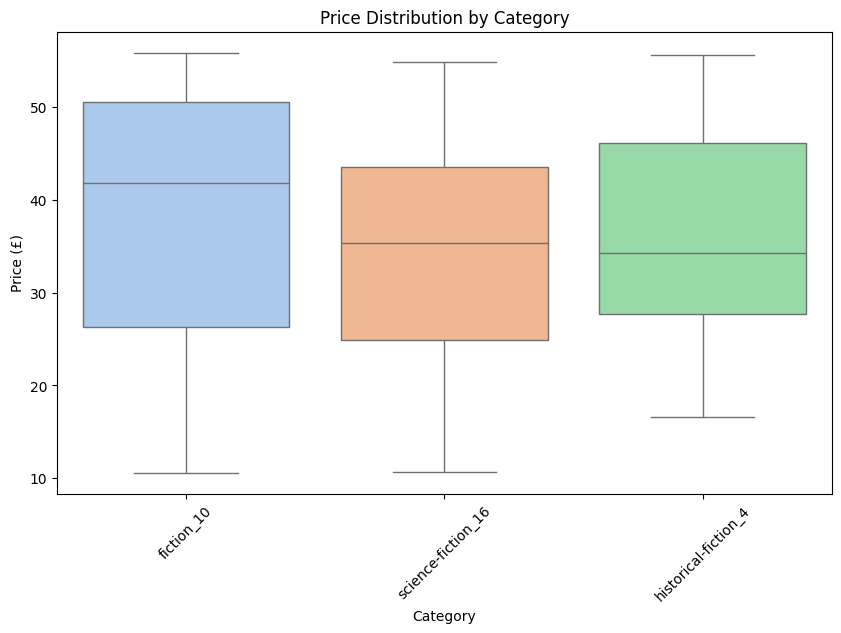

In [16]:
import seaborn as sns

# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Price', data=all_data, palette='pastel')
plt.title('Price Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Price (£)')
plt.xticks(rotation=45)
plt.show()

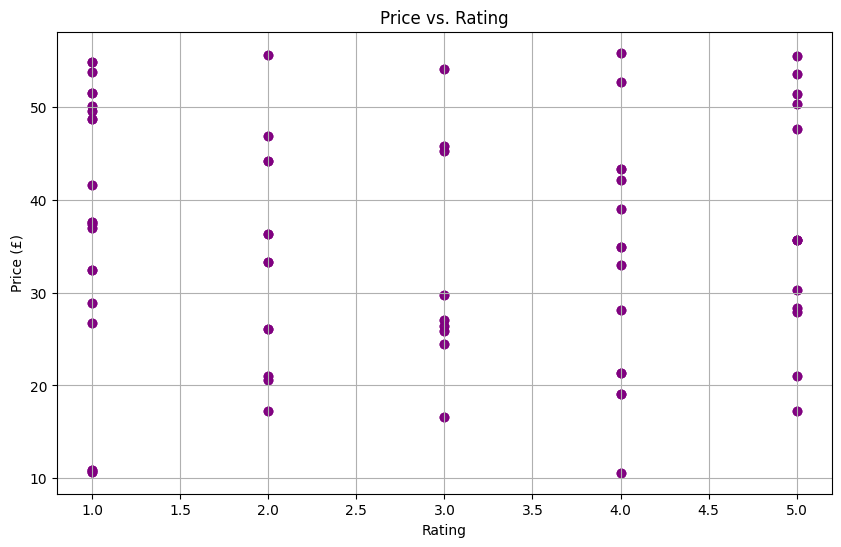

In [17]:
# Convert Rating to numerical values
rating_map = {'One': 1, 'Two': 2, 'Three': 3, 'Four': 4, 'Five': 5}
all_data['Rating'] = all_data['Rating'].map(rating_map)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(all_data['Rating'], all_data['Price'], alpha=0.5, color='purple')
plt.title('Price vs. Rating')
plt.xlabel('Rating')
plt.ylabel('Price (£)')
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

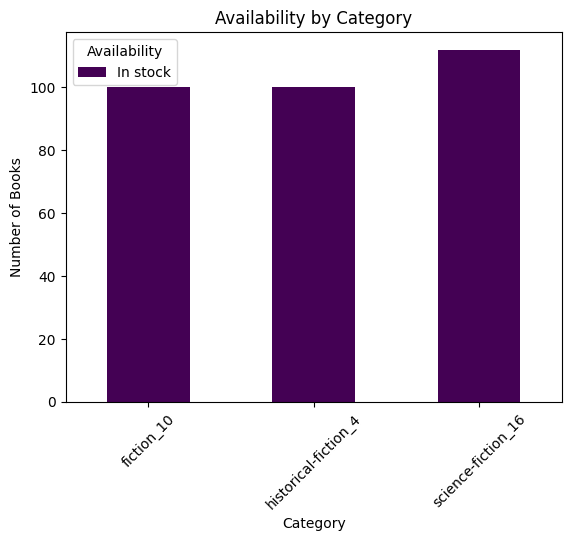

In [18]:
# Count the number of books by availability and category
availability_counts = all_data.groupby(['Category', 'Availability']).size().unstack()

# Plot
plt.figure(figsize=(10, 6))
availability_counts.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Availability by Category')
plt.xlabel('Category')
plt.ylabel('Number of Books')
plt.xticks(rotation=45)
plt.legend(title='Availability')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_10264\3857394756.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Rating', y='Price', data=all_data, palette='muted')


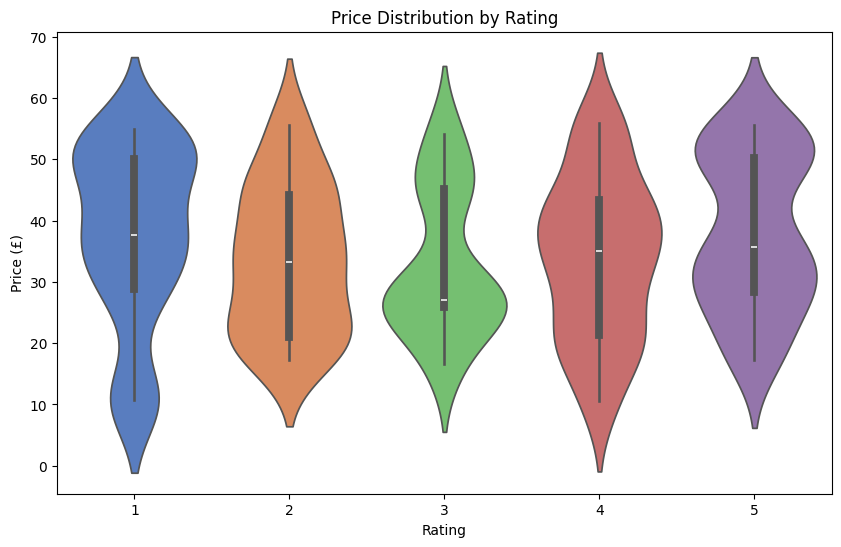

In [20]:

# Plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Rating', y='Price', data=all_data, palette='muted')
plt.title('Price Distribution by Rating')
plt.xlabel('Rating')
plt.ylabel('Price (£)')
plt.show()

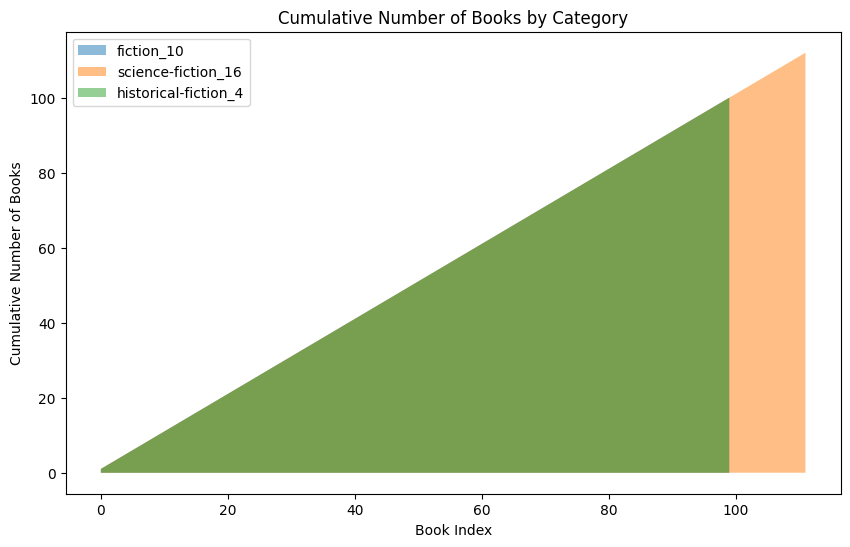

In [21]:
# Calculate cumulative number of books by category
all_data['Cumulative Books'] = all_data.groupby('Category').cumcount() + 1

# Plot
plt.figure(figsize=(10, 6))
for category in categories:
    category_data = all_data[all_data['Category'] == category]
    plt.fill_between(category_data.index, category_data['Cumulative Books'], label=category, alpha=0.5)

plt.title('Cumulative Number of Books by Category')
plt.xlabel('Book Index')
plt.ylabel('Cumulative Number of Books')
plt.legend()
plt.show()

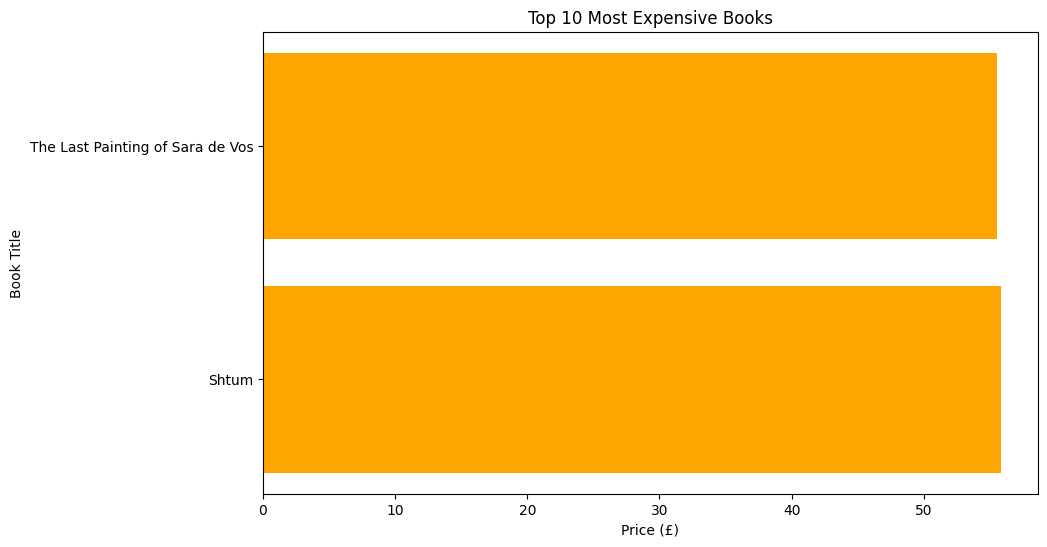

In [22]:
# Sort by price and select top 10
top_10_expensive = all_data.nlargest(10, 'Price')

# Plot
plt.figure(figsize=(10, 6))
plt.barh(top_10_expensive['Title'], top_10_expensive['Price'], color='orange')
plt.title('Top 10 Most Expensive Books')
plt.xlabel('Price (£)')
plt.ylabel('Book Title')
plt.show()